# Lab5: Linear regression

Lab5 is required to finish the following tasks based on this incomplete Notebook file. 

## Preliminary

Linear model: model prediction is a **linearly weighted sum** of input features, such as 
$$y = \sum_{i=1}^{D} w_ix_i = \mathbf{w}^{T}\mathbf{x},$$ 
where $\mathbf{w} \in \mathrm{R}^{D}$ is called as the model parameter or mapping weight.

In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from pdb import set_trace as st
from sklearn.datasets import load_boston
from sklearn import linear_model


# Let's load a real-world data set first
X, y = load_boston(return_X_y=True)
N,D = X.shape
assert len(X)==len(y), print('inequal # of samples and labels')
print('This data set is given with {} sampels and {} features'.format(N, D))

This data set is given with 506 sampels and 13 features


In [17]:
# Hold out a proportion of data as the testing set
# We do random sampling and save a seed for repeating results
np.random.seed(0)
ratio = 0.1
ind = np.random.choice(len(y), int(ratio*len(y)), replace=False)
ind = np.sort(ind)
print(ind)

[  1  15  21  37  45  46  78  97 100 102 107 113 144 153 154 162 171 173
 175 196 219 241 247 278 293 297 299 310 320 329 330 340 342 363 367 371
 372 386 400 403 411 418 430 446 459 474 475 478 480 487]


In [18]:
ind_trn = [i for i in range(len(y)) if i not in ind]
X_trn, y_trn = X[ind_trn], y[ind_trn]
X_tst, y_tst = X[ind], y[ind]

## Task 1: Linear Regression (40 pts)
Task 1 requires building a linear regression model. Recall that 
$\mathcal{L}_{w} = \frac{1}{2} \|\mathbf{y} - \mathbf{X}w\|^{2}$, $w^{*} = \texttt{argmin}_{w}\mathcal{L}_{w}=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$

Then, we may have $\hat{\mathbf{y}} = \mathbf{X}w^{*}$ as the linear model prediction.

In [62]:
# Compute w^{*} on the training set; we denote w_l as w^{*} in the following codes.
# NOTO: Complete the following line to implement the linear regression solution
w_l = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_trn), X_trn)), np.transpose(X_trn)), y_trn)
# NOTO: How to get the model predition with w_l?
# We denote y_hat as the prediction on the training set
y_hat = np.matmul(X_trn,w_l) 

# Compute the objection function as a measurement
# We have multiple choices for impmenting l2 norm
err1 = 0.5 * ((y_trn-y_hat)**2).sum()
err2 = 0.5 * (np.linalg.norm(y_trn-y_hat, ord=2))**2
print(err1, err2)
# Let's define a Lambda function for computing the err
obj = lambda a,b: 0.5 * ((a-b)**2).sum()
print(obj(y_trn, y_hat))

4965.549364962317 4965.549364962317
4965.549364962317


In [48]:
# TODO: How to compute the testing loss?
# Complete the following line to obtain predictions on the testing set
y_tst_hat = np.matmul(X_tst,w_l)
# TODO: Employ the pre-defined Lambda function obj to compute the testing loss
print("testing loss is {:.3f}".format(obj(y_tst,y_tst_hat)))

testing loss is 1215.714


In [49]:
# Let's deinfe Mean Squared Error (MSE) for measuring the model performance
def mse(y_hat, y):
    return ((y_hat-y)**2).sum()/len(y)
# TODO: Compute MSE on the training and testing sets. 
print("linear regression: training err={:.3f}, testing err={:.3f}".format(mse(y_hat,y_trn), mse(y_tst_hat, y_tst)))

linear regression: training err=21.779, testing err=48.629


##  Task 2: Ridge Regression (40 pts)
For Ridge regression, we have
$\mathcal{L}_{w} = \frac{1}{2}( \|\mathbf{y} - \mathbf{X}w\|^{2} + \lambda \|w\|^{2}$), $w^{*} = \texttt{argmin}_{w}\mathcal{L}_{w}=(\mathbf{X}^{T}\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^{T}\mathbf{y}$, 
where $\lambda > 0 $ is a trade-off hyperparameter balancing regression error and $\ell_2$ regularization.

In [57]:
# NOTE: The hyperparameter lambda (denoted as alpha in our codes) is usually pre-defined and fixed.
alpha = 200 # lambda is a Python preserved keyword
# TODO: How to implement w_r as the optimal solution of ridge regression?
X_scatter = np.matmul(X_trn.T, X_trn) + alpha * np.eye(len(X_trn.T))
# NOTE: Utilize the scatter matrix X_scatter to help you implement w_r
w_r = np.matmul(np.matmul(np.linalg.inv(X_scatter),X_trn.T),y_trn)
# TODO: How to obtain model predictions on training and testing sets?
y_r_trn =  np.matmul(X_trn,w_r)  # predictions on the training set
y_r_tst =  np.matmul(X_tst,w_r)  # predictions on the testing set
print("Ridge regression: training err={:.3f}, testing err={:.3f}".format(mse(y_hat,y_r_trn), mse(y_tst_hat, y_r_tst)))

Ridge regression: training err=4.221, testing err=3.712


In [58]:
# Check your result with the Sklearn implementation
# We instantiate a model first
model = linear_model.Ridge(alpha=alpha, fit_intercept=False)
model.fit(X_trn, y_trn) # Train the model, which is exactly equivelent to what we do for computing w_r
# Compare two implementations' obtained weights
print(model.coef_)
print(w_r)
y_r_tst2 = model.predict(X_tst)
# TODO: Compare the MSEs between our implementation and the Sklearn
print("Our implementation={:.3f}, Sklearn={:.3f}".format(mse(y_hat,y_trn), mse(y_tst_hat, y_r_tst2)))

[-0.10181258  0.06922355 -0.03890019  0.3759772   0.15288499  3.77793827
  0.03395499 -0.51975428  0.14959013 -0.00845617 -0.04508548  0.0213355
 -0.52527151]
[-0.10181258  0.06922355 -0.03890019  0.3759772   0.15288499  3.77793827
  0.03395499 -0.51975428  0.14959013 -0.00845617 -0.04508548  0.0213355
 -0.52527151]
Our implementation=21.779, Sklearn=3.712


## Task 3: Review the concepts of over/under-fitting (20 pts)
- *Overfitting*: You model fits the training data too well, resulting in less generalizability in handling new data (model is too complex).
- *Underfitting*: You model underperforms on the training data (model is too simple or designed improperly).

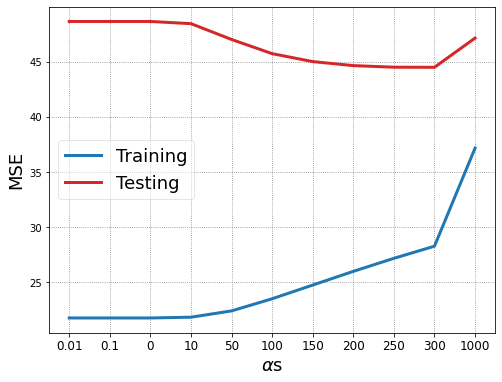

In [61]:
# NOTE: To show the impact of alpha on model performance, we compare MSEs given by different hyperparameters.
# This is one example of what we called "Parameter analysis"
alphas = [0.01, 0.1, 0, 10, 50, 100, 150, 200, 250, 300, 1000]
loss_trns = []
loss_tsts = []
for alpha in alphas:
    # NOTE: For each alpha, we define and train a new Sklearn ridge regression model
    # TODO: Complete the following two lines
    model = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    model.fit(X_trn, y_trn)
    # TODO: For each model, we collect its training and testing errors
    loss_trns.append(mse(model.predict(X_trn), y_trn))
    loss_tsts.append(mse(model.predict(X_tst), y_tst))

fig, ax = plt.subplots(figsize=(8,6))
plt.grid(which='both',axis='both', color='grey',linestyle=':')

plt.plot(np.arange(len(alphas)), loss_trns, label='Training', color='tab:blue', linewidth=3)
plt.plot(np.arange(len(alphas)), loss_tsts, label='Testing', color='tab:red', linewidth=3)

plt.ylabel('MSE', fontsize=18)
plt.xlabel(r'${\alpha}$s', fontsize=18)
plt.xticks(np.arange(len(alphas)), alphas, fontsize=12)
plt.legend(fancybox=True, framealpha=0.5, fontsize=18)
plt.show()

## How to tune $\lambda$?
Set a validation set, i.e., randomly sampling a validation set from the training set, to tune the hyperparameter as shown above. 

**Note that, it is INCORRECT to tune hyperparamters on the testing set. The above example is only for the demonstration purpose of showing overfitting vs underfitting.**